In [1]:
#Importing the necessary modules
from wise_light_curves.wise_light_curves import *
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
from matplotlib.patches import ConnectionPatch
import matplotlib.ticker as tick
from astropy.io import ascii
import numpy as np
import pandas as pd
import os
import scipy
from Potato import plotparams
from astropy.timeseries import LombScargle as ls
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy import constants as const
import heapq
#End of Importing

In [2]:
#This is where the asassnid goes
id_val = 438086901547																																																																															

ra_val = 279.0252466	   			

dec_val = -31.80714478													

cust_id = 'J183606-314826'

# 																																																																																										 																																																																		 										 																																																																																																																																														

In [3]:
#Defining the read_lightcurve function. This function reads data files and imports them
def read_lightcurve(asas_sn_id, guide = 'known_dipper_lightcurves/'):
    """
    Input: 
        asas_sn_id: the asassn id of the desired star
        guide: the path to the data file of the desired star

    Output: 
        dfv: This is the dataframe for the V-band data of the star
        dfg: This is the dataframe for the g-band data of the star
    
    This function reads the data of the desired star by going to the corresponding file and copying the data of that file onto 
    a data frame. This data frame is then sorted into two data frames by comparing the value in the Photo filter column. If the
    Photo filter column data has a value of one, its row is sorted into the data frame corresponding to the V-band. If the Photo
    filter column data has a value of zero, it gets sorted into the data frame corresponding to the g-band.
    """
    fname = os.path.join(guide, str(asas_sn_id)+'.dat')

    dfv = pd.DataFrame()
    dfg = pd.DataFrame()

    fdata = pd.read_fwf(fname, header=None)
    fdata.columns = ["JD", "Mag", "Mag_err", "Quality", "Cam_number", "Phot_filter", "Camera"] #These are the columns of data

    dfv = fdata.loc[fdata["Phot_filter"] == 1].reset_index(drop=True) #This sorts the data into the V-band
    dfg = fdata.loc[fdata["Phot_filter"] == 0].reset_index(drop=True) #This sorts the data into the g-band

    return dfv, dfg
#End of read_lightcurve function

In [4]:
dfv, dfg = read_lightcurve(id_val, 'Updated_LC_data/')

dfg = dfg.loc[dfg.Mag < 15].reset_index(drop=True)

dfg['Mag'] = [float(i) for i in dfg['Mag']]

dfg['JD'] = [float(i) for i in dfg['JD']]

mag = dfg['Mag']

jd = dfg['JD']

meanmag = sum(mag) / len(mag)

dfg_mag_avg = [i - meanmag for i in mag]

peaks = scipy.signal.find_peaks(dfg_mag_avg, prominence=0.17, distance=25, height=0.3, width=2) 

peak = peaks[0]

prop = peaks[1]

length = len(peak)

peak = [int(i) for i in peak]

peak = pd.Series(peak)

In [5]:
print('The mean magnitude of the whole light curve:', meanmag)

The mean magnitude of the whole light curve: 13.863221746556464


In [6]:
c = SkyCoord(ra=ra_val*u.degree, dec=dec_val*u.degree, frame='icrs')
print(c.ra.hms)
print(c.dec.dms)

hms_tuple(h=18.0, m=36.0, s=6.059184000010873)
dms_tuple(d=-31.0, m=-48.0, s=-25.721208000005618)


['bE' 'bi' 'bm' 'bq']
Number of peaks: 1


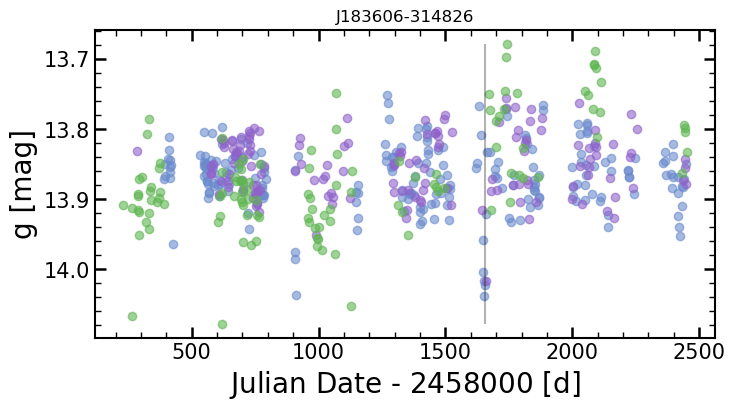

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)
ax.set_title(cust_id)

top = 14.4
bottom = 13.6

cams = dfg["Camera"]
camtype = np.unique(cams)

dfg = dfg.loc[dfg.Camera != 'bi'].reset_index(drop=True)

print(camtype)
camnum = len(camtype)

print('Number of peaks:', length)

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    for j in range(0,len(camdf)):
        camjd = [float(i) for i in camdf["JD"]]
        cammag = [float(i) for i in camdf['Mag']]
        ax.scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], color = colors[i], alpha = 0.6)

for i in range(len(peak)):
    ax.vlines((jd[peak[i]] - (2.458 * 10**6)), min(dfg.Mag), max(dfg.Mag), "k", alpha=0.3)

ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2458000$ [d]', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show() 

In [ ]:
df_bi = dfg.loc[dfg.Camera == 'bi'].reset_index(drop=True)
df_bi_close = df_bi.loc[df_bi.Mag > 14].reset_index(drop=True)
df_bi_close.head(10)

In [ ]:
left = 1630
right = 1670

dfg_dip = dfg.loc[dfg["JD"] > (left + 2.458 * 10**6)].reset_index(drop=True)
dfg_dip = dfg_dip.loc[dfg_dip["JD"] < (right + 2.458 * 10**6)].reset_index(drop=True)
print(len(dfg_dip))

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle(cust_id, fontsize = 22)

ax[0] = plotparams(ax[0])

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    for j in range(0,len(camdf)):
        camjd = [float(i) for i in camdf["JD"]]
        cammag = [float(i) for i in camdf['Mag']]
        ax[0].scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], color = colors[i], alpha = 0.6)

#ax[0].scatter((dfg["JD"] - (2.458 * 10 **6)), dfg['Mag'], color = "#6b8bcd", alpha = 0.6)
#ax[0].add_patch(Rectangle(
 #   (left,(bottom + 0.05)),
  #  (right-left),
   # (top-bottom-0.075),
    #fc ='none',  
    #ec ='black', 
    #lw = 2))

#ax[0].set_ylim(bottom,top)
ax[0].invert_yaxis() 
ax[0].set_xlabel('Julian Date - $2458000$ [d]', fontsize=20)
ax[0].set_ylabel('g [mag]', fontsize=20)

ax[1] = plotparams(ax[1])

cams2 = dfg_dip["Camera"]
camtype2 = np.unique(cams2)
camnum2 = len(camtype2)

colors2 = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
camdf2 = pd.DataFrame()

for i in range(0,camnum2):
    camdf2 = dfg_dip.loc[dfg_dip["Camera"] == camtype2[i]].reset_index(drop=True)
    for j in range(0,len(camdf2)):
        camjd2 = [float(i) for i in camdf2["JD"]]
        cammag2 = [float(i) for i in camdf2['Mag']]
        ax[1].scatter((camjd2[j] - (2.458 * 10 **6)), cammag2[j], color = colors2[i], alpha = 0.6)

#ax[1].scatter((dfg_dip["JD"] - (2.458 * 10 **6)), dfg_dip['Mag'], color = "#6b8bcd", alpha = 0.6)
#ax[1].set_ylim(bottom,top)
ax[1].invert_yaxis() 
ax[1].set_xlabel('Julian Date - $2458000$ [d]', fontsize=20)
#ax[1].set_ylabel('g [mag]', fontsize=20)

#offset = 45

#con1 = ConnectionPatch(xyA =(right, (top - 0.025)),
 #                     coordsA = ax[0].transData,
  #                    xyB =((left+offset), top), 
   #                   coordsB = ax[1].transData)

#con1.set_color([0, 0, 0])
#con1.set_linewidth(2)
#ax[1].add_artist(con1)

#con2 = ConnectionPatch(xyA =(right, (bottom +0.05)),
 #                     coordsA = ax[0].transData,
  #                    xyB =((left+offset), bottom), 
   #                   coordsB = ax[1].transData)

#con2.set_color([0, 0, 0])
#con2.set_linewidth(2)
#ax[1].add_artist(con2)

plt.show() 

In [ ]:
dfg_nodip1 = dfg.loc[dfg["JD"] < (left + 2.458 * 10**6)].reset_index(drop=True)
#dfg_nodip1 = dfg_nodip1.loc[dfg_nodip1['JD'] > (left - 100 + 2.458 * 10**6)].reset_index(drop=True)
dfg_nodip2 = dfg.loc[dfg["JD"] > (right + 2.458 * 10**6)].reset_index(drop=True)
#dfg_nodip2 = dfg_nodip2.loc[dfg_nodip2['JD'] < (right + 100 + 2.458 * 10**6)].reset_index(drop=True)
dfg_nodip = pd.concat([dfg_nodip1,dfg_nodip2])
print(len(dfg_nodip))
print(len(dfg_dip))
print(len(dfg))

In [ ]:
dfg_dip.head(10)

In [ ]:
meannodip = np.mean(dfg_nodip['Mag'])
stdnodip = np.std(dfg_nodip['Mag'])

deep = max(dfg_dip['Mag'])

print('The mean of the LC w/out the dip:', meannodip)
print('The std of the LC w/out the dip:',stdnodip)
print('The deepest point of the dip:', deep)

dfg_deepest = dfg.loc[dfg['Mag'] == deep].reset_index(drop=True)
deep_time = Time(dfg_deepest['JD'][0], format='jd')
deep_time.format = 'iso'

print('The time of the deepest point:', deep_time, dfg_deepest['JD'][0])

first_time = Time(dfg['JD'][0], format='jd')
first_time.format = 'iso'

print('The time of the first measurement:', first_time)

depth = deep - meannodip

print('Dip depth:', depth)

In [ ]:
dfg_time = dfg_dip.loc[dfg_dip['Mag'] >= (meannodip + 2*stdnodip)].reset_index(drop=True)

t1 = dfg_time['JD'][0]
t2 = dfg_time['JD'][len(dfg_time['JD'])-1]

time1 = Time(t1, format='jd')
time1.format = 'iso'

time2 = Time(t2, format='jd')
time2.format = 'iso'

print(time1)
print(time2)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)
ax.set_title(cust_id)

cams = dfg_time["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg_time.loc[dfg_time["Camera"] == camtype[i]].reset_index(drop=True)
    for j in range(0,len(camdf)):
        camjd = [float(i) for i in camdf["JD"]]
        cammag = [float(i) for i in camdf['Mag']]
        ax.scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], color = colors[i], alpha = 0.6)

#ax.scatter(dfg_dip['JD'], dfg_dip['Mag'], color = "#6b8bcd", alpha = 0.6)
#ax.set_ylim(bottom,top)
ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2.458x10^{6}$ [d]', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show() 

In [ ]:
dfg_time.head(6)

In [ ]:
print(t2-t1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)
ax.set_title(cust_id)

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

cams2 = dfv["Camera"]
camtype2 = np.unique(cams2)
camnum2 = len(camtype2)

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
camdf = pd.DataFrame()

camdf2 = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    for j in range(0,len(camdf)):
        camjd = [float(i) for i in camdf["JD"]]
        cammag = [float(i) for i in camdf['Mag']]
        ax.scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], color = colors[i], alpha = 0.6)

for i in range(0,camnum2):
    camdf2 = dfv.loc[dfv["Camera"] == camtype2[i]].reset_index(drop=True)
    for j in range(0,len(camdf2)):
        camjd2 = [float(i) for i in camdf2["JD"]]
        cammag2 = [float(i) for i in camdf2['Mag']]
        ax.scatter((camjd2[j] - (2.458 * 10 **6)), cammag2[j], color = colors[i], alpha = 0.6)

ax.set_xlim(-300,-250)
#ax.set_ylim(12.8,13.5)
ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2458000$ [d]', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show()

dflbs1 = dfg.loc[dfg['JD'] >= 100+2458000].reset_index(drop=True)
dflsb = dflbs1.loc[dflbs1['JD'] <= 200+2458000].reset_index(drop=True)

vtime = Time(dflsb.JD[0], format='jd')
vtime.format = 'iso'

print(dflsb.JD[0])
print(vtime)

dflsb.head(10)

In [ ]:
#freq = np.linspace(0.1, 0.9, 20000)
#power = ls(dfg_nodip["JD"], dfg_nodip["Mag"]).power(freq)
freq, power = ls(dfg_nodip["JD"], dfg_nodip["Mag"]).autopower(minimum_frequency=0.01,
                                                   maximum_frequency=4.9,
                                                   samples_per_peak=25)
#fal = ls.false_alarm_level([0.001,1e-4])

#print(fal)
plt.plot(freq, power)

In [ ]:
index_nums = heapq.nlargest(400,power)
j = freq[np.where(power == index_nums[0])]
t = 191 #(1 / j) *2
print('frequency:',j)
print('period:', t)


dfg["OrbNum"] = dfg["JD"] / t
dfg["Phase"] = dfg["OrbNum"] % 1
dfg.head(10)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)
#ax.set_title(cust_id)
ax.set_title('Contact Binary ($P=0.5$ days)', fontsize=20)

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    for j in range(0,len(camdf)):
        camjd = [float(i) for i in camdf["Phase"]]
        cammag = [float(i) for i in camdf['Mag']]
        ax.scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], color = colors[i], alpha = 0.6)

#ax.set_ylim(bottom,top)
ax.invert_yaxis() 
ax.set_xlabel('Phase', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show()

In [ ]:
deep_v = max(dfv['Mag'])

print('The deepest point (V-band) of the dip:', deep_v)

dfv_deepest = dfv.loc[dfv['Mag'] == deep_v].reset_index(drop=True)
deep_v_time = Time(dfv_deepest['JD'][0], format='jd')
deep_v_time.format = 'iso'

print('The time of the deepest point:', deep_v_time, dfv_deepest['JD'][0])

In [ ]:
download_single_data(name='wise_'+str(id_val), ra=ra_val, dec=dec_val, root_path='WISE_Data/', radius=2.)

allwise = ascii.read('WISE_Data/wise_'+str(id_val)+'_allwise.ipac', format='ipac')
neowise = ascii.read('WISE_Data/wise_'+str(id_val)+'_neowise.ipac', format='ipac')
allwise, neowise = only_good_data_v1(allwise, neowise)

print(allwise)
print(neowise)

# MJD = JD - 2400000.5.
allwise['jd'] = allwise['mjd'] + 2400000.5
neowise['jd'] = neowise['mjd'] + 2400000.5

alldf = pd.DataFrame(np.array(allwise))
neodf = pd.DataFrame(np.array(neowise))

In [ ]:
print(alldf.columns)
alldf.head(10)

In [ ]:
print(neodf.columns)
neodf.head(10)

In [ ]:
plot_full_lightcurve(allwise,neowise)

In [ ]:
alldf['bins'] = pd.cut(alldf['mjd'],3)

bins = alldf['bins'].unique()

all_df = pd.DataFrame()

for i in bins:
    allbin = alldf.loc[alldf['bins'] == i].reset_index(drop=True)
    allbin['w1mpro_ep'] = allbin['w1mpro_ep'].median()
    allbin['w2mpro_ep'] = allbin['w2mpro_ep'].median()
    all_df = pd.concat([all_df,allbin])

all_df.head(10)

In [ ]:
neodf['bins'] = pd.cut(neodf['mjd'],21)

bins = neodf['bins'].unique()

neo_df = pd.DataFrame()

for i in bins:
    neobin = neodf.loc[neodf['bins'] == i].reset_index(drop=True)
    neobin['w1mpro'] = neobin['w1mpro'].median()
    neobin['w2mpro'] = neobin['w2mpro'].median()
    neo_df = pd.concat([neo_df,neobin])

neo_df.head(10)

In [ ]:
wise_day1 = list(all_df['jd'])
wise_day2 = list(neo_df['jd'])
wise_day = wise_day1 + wise_day2

wise_w1_1 = list(all_df['w1mpro_ep'])
wise_w1_2 = list(neo_df['w1mpro'])
wise_w1 = wise_w1_1 + wise_w1_2

wise_w2_1 = list(all_df['w2mpro_ep'])
wise_w2_2 = list(neo_df['w2mpro'])
wise_w2 = wise_w2_1 + wise_w2_2

wise_color = [j-i for i,j in zip(wise_w2,wise_w1)]

In [ ]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(8, 8))
fig.subplots_adjust(hspace=0)
ax[0] = plotparams(ax[0])
ax[0].set_title(cust_id, fontsize=25, pad=10)

wise_day_plot = [i - (2.458 * 10 **6) for i in wise_day]

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
ax[0].scatter((dfg['JD'] - (2.458 * 10 **6)), dfg['Mag'], color = colors[2], label='ASAS-SN g-band', alpha = 0.6, marker='.')
ax[0].scatter((dfv['JD'] - (2.458 * 10 **6)), dfv['Mag'], color = colors[6], label = 'ASAS-SN V-band', alpha = 0.6, marker = 'v', s=20)

#ax[0].set_ylim(12.8,13.5)
ax[0].invert_yaxis() 
ax[0].set_ylabel('ASAS-SN', fontsize=20)

ax[1] = plotparams(ax[1])

ax[1].scatter(wise_day_plot, wise_w1, color=colors[1], label='W1', alpha=0.6,  marker = 's')
ax[1].scatter(wise_day_plot, wise_w2, color=colors[0], label='W2', alpha=0.6,  marker = 'x')

ax[1].invert_yaxis()
ax[1].set_ylabel('WISE', fontsize=20)

ax[2] = plotparams(ax[2])

ax[2].scatter(wise_day_plot, wise_color, color=colors[5], label='W1$-$W2', alpha=0.6,  marker = '^')

ax[2].set_ylabel('W1$-$W2', fontsize=20)

ax[2].set_xlabel('Julian Date - $2458000$ [d]', fontsize=20)

handles1, labels1 = ax[0].get_legend_handles_labels()
handles2, labels2 = ax[1].get_legend_handles_labels()
handles3, labels3 = ax[2].get_legend_handles_labels()
handles = handles1 + handles2 + handles3
labels = labels1 + labels2 + labels3
fig.legend(handles, labels, loc='upper left', edgecolor='black', fontsize=12, bbox_to_anchor=(0.12,0.88))
#fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.12,0.5))
#loc='upper left', edgecolor='black', fontsize=18
plt.show()

In [ ]:
leftv = 300
rightv = 400

dfv_dip = dfv.loc[dfv["JD"] > (leftv + 2.458 * 10**6)].reset_index(drop=True)
dfv_dip = dfv_dip.loc[dfv_dip["JD"] < (rightv + 2.458 * 10**6)].reset_index(drop=True)
print(len(dfv_dip))

dfv_nodip1 = dfv.loc[dfv["JD"] < (leftv + 2.458 * 10**6)].reset_index(drop=True)
dfv_nodip2 = dfv.loc[dfv["JD"] > (rightv + 2.458 * 10**6)].reset_index(drop=True)
dfv_nodip = pd.concat([dfv_nodip1,dfv_nodip2])
print(len(dfv_nodip))
print(len(dfv_dip))
print(len(dfv))

In [ ]:
meannodipv = np.mean(dfv_nodip['Mag'])
stdnodipv = np.std(dfv_nodip['Mag'])

deepv = max(dfv_dip['Mag'])

print('The mean of the LC w/out the dip:', meannodipv)
print('The std of the LC w/out the dip:',stdnodipv)
print('The deepest point of the dip:', deepv)

dfv_deepest = dfv.loc[dfv['Mag'] == deepv].reset_index(drop=True)
deepv_time = Time(dfv_deepest['JD'][0], format='jd')
deepv_time.format = 'iso'

print('The time of the deepest point:', deepv_time, dfv_deepest['JD'][0])

firstv_time = Time(dfv['JD'][0], format='jd')
firstv_time.format = 'iso'

print('The time of the first measurement:', firstv_time)

depthv = deepv - meannodipv

print('Dip depth:', depthv)

dfv_time = dfv_dip.loc[dfv_dip['Mag'] >= (meannodipv + 2*stdnodipv)].reset_index(drop=True)

t1v = dfv_time['JD'][0]
t2v = dfv_time['JD'][len(dfv_time['JD'])-1]

time1v = Time(t1v, format='jd')
time1v.format = 'iso'

time2v = Time(t2v, format='jd')
time2v.format = 'iso'

print('Dip duration:', t2v-t1v)

print(time1v)
print(time2v)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)
ax.set_title(cust_id)

cams = dfv_time["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfv_time.loc[dfv_time["Camera"] == camtype[i]].reset_index(drop=True)
    for j in range(0,len(camdf)):
        camjd = [float(i) for i in camdf["JD"]]
        cammag = [float(i) for i in camdf['Mag']]
        ax.scatter((camjd[j] - (2.458 * 10 **6)), cammag[j], color = colors[i], alpha = 0.6)

#ax.scatter(dfg_dip['JD'], dfg_dip['Mag'], color = "#6b8bcd", alpha = 0.6)
#ax.set_ylim(bottom,top)
ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2.458x10^{6}$ [d]', fontsize=20)
ax.set_ylabel('V [mag]', fontsize=20)
plt.show() 

In [ ]:
J1734_lamost = pd.read_csv('223339338105_lamost.csv')
J1734_lamost_cut = J1734_lamost.loc[J1734_lamost['Wavelength'] > 6500].reset_index(drop=True)
J1734_lamost_cut = J1734_lamost_cut.loc[J1734_lamost_cut['Wavelength'] < 6625].reset_index(drop=True)
J1734_lamost_cut.head(10)

In [ ]:
def full_wavelength_shift(df, r, rv):
    ll = 656.3*(10)

    wavelength_range = (ll-r, ll+r)
    idx = np.where( (df.Wavelength > wavelength_range[0]) & (df.Wavelength < wavelength_range[1]))[0]
    df = df.iloc[idx].reset_index(drop=True)

    c = 299792458.0 #speed of light m/s

    factor = 1 / (1 + (rv * 1000.) / c)

    shifted = np.interp(df.Wavelength,
                    df.Wavelength/factor,
                    df.Flux,
                    left=np.nan, right=np.nan)

    df['Flux'] = shifted
    df = df[~df.Flux.isna()].reset_index(drop=True)

    rest = ll*u.AA

    vel = const.c * (df.Wavelength.values*u.AA - rest) / rest
    vel = vel.to('km/s').value
    df['vel'] = vel

    return df

In [ ]:
def part_wave(wave):
    l = 656.3*(10**-9)
    c = 299792458.0
    factor = 1 / (1 + (0 * 1000) / c)
    vel = (c * ((wave*(10**-10)/factor) - l) / l) / 1000
    return vel


In [ ]:
def inv_part_wave(vel):
    l = 656.3*(10**-9)
    c = 299792458.0
    factor = 1 / (1 + (0 * 1000) / c)
    wave = (l/c)*((1000*(vel))+c)/(10**-10)
    return wave / factor


In [ ]:
Shift = full_wavelength_shift(J1734_lamost, 100, 0)
Shift[:7]

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.suptitle('J174328+343315', size=18, y = 1.05)

ax.minorticks_on()
ax.tick_params(direction='in', which='both', labelsize=12)
ax.tick_params('both', length=8, width=1.8, which='major')
ax.tick_params('both', length=4, width=1, which='minor')

ax.set_xlabel('Rest Wavelength [$\AA{}$]', fontsize=15)
ax.set_ylabel('Flux',fontsize=15)
ax.plot(J1734_lamost_cut['Wavelength'],J1734_lamost_cut['Flux'],color='k')

secax = ax.secondary_xaxis('top', functions=(part_wave,inv_part_wave))
secax.tick_params(direction='in', which='both', labelsize=12, length=8, width=1.8)
secax.minorticks_on()
secax.tick_params('both', length=4, width=1, which='minor')
secax.set_xlabel('Velocity [km/s]', fontsize=15)
ax.axvline(6563, color='black', ls='--')

ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(direction='in', which='both', labelsize=15)
ax.tick_params('both', length=8, width=1.8, which='major')
ax.tick_params('both', length=4, width=1, which='minor')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)

for axe in ax.flatten():
    axe.invert_yaxis()
    axe.minorticks_on()
    axe.tick_params(axis='x', direction='in', top=False, labelbottom=True, bottom=True, pad=-15, labelsize=12)
    axe.tick_params(axis='y', direction='in', right=False, pad=-35, labelsize=12)
    axe.tick_params('both', length=6, width=1.5, which='major')
    axe.tick_params('both', direction='in', length=4, width=1, which='minor')
    axe.yaxis.set_minor_locator(tick.MultipleLocator(0.1))
    secax = axe.secondary_xaxis('top', functions=(jd_to_year,year_to_jd))
    secax.xaxis.set_tick_params(direction='in', labelsize=12, pad=-18, length=6, width=1.5) 
    for axis in ['top', 'bottom', 'left', 'right']:
        axe.spines[axis].set_linewidth(1.5)